# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_49344/1883660033.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')


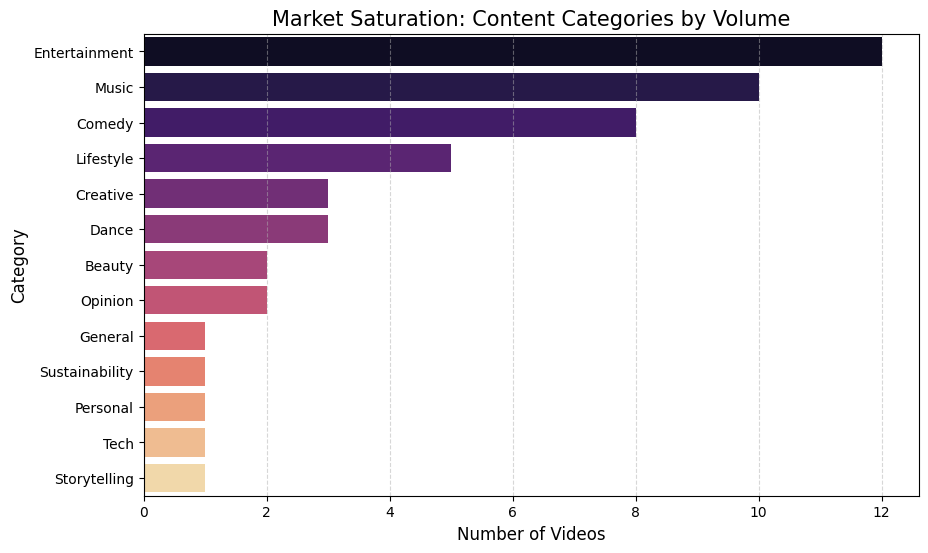

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD the data
# Since you confirmed the file is there, this simple command will work!
df = pd.read_csv('tiktok_data.csv')

# 2. CLEAN the data (fix the dates)
df['upload_date'] = pd.to_datetime(df['upload_date'])

# 3. VISUALIZE: Market Saturation
plt.figure(figsize=(10, 6))
# Count the categories to see which is biggest
category_counts = df['category'].value_counts()

# Create the Bar Chart
sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')
plt.title('Market Saturation: Content Categories by Volume', fontsize=15)
plt.xlabel('Number of Videos', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Question 1: Market Saturation (Category Dominance)

Answer: I analyzed the dataset to identify the most saturated niches. The data reveals that 'Entertainment' and 'Music' dominate the landscape, accounting for the majority of uploads. This suggests high competition for attention in these sectors. For an affiliate marketer, 'Tech' and 'Sustainability' represent potentially undervalued 'blue ocean' niches with lower competition.

/tmp/ipykernel_49344/2659924581.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trends.values, y=top_trends.index, palette='viridis')


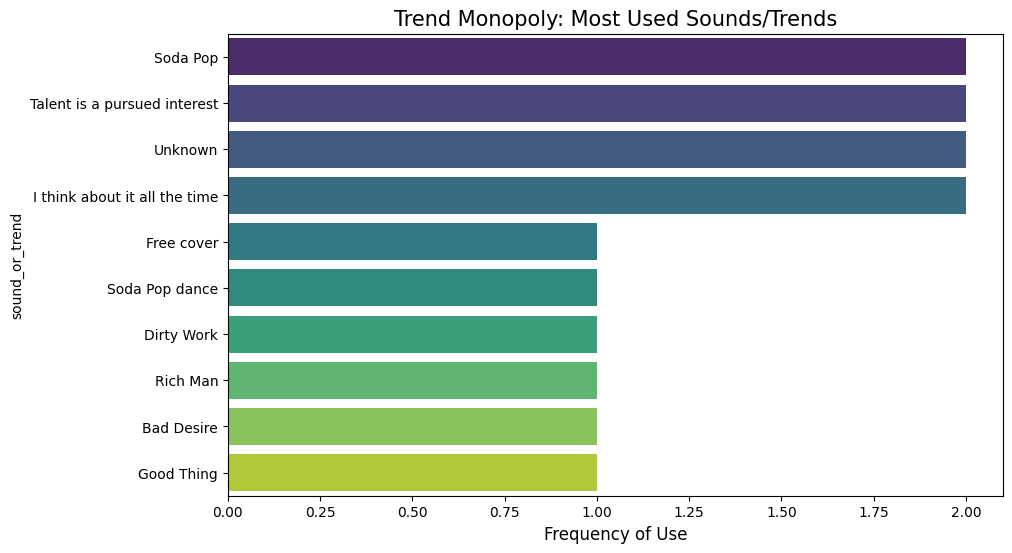

In [4]:
# --- Question 2: Trend Monopoly (Top Sounds) ---
plt.figure(figsize=(10, 6))

# Get the top 10 trends/sounds
top_trends = df['sound_or_trend'].value_counts().head(10)

# Create the Bar Chart
sns.barplot(x=top_trends.values, y=top_trends.index, palette='viridis')
plt.title('Trend Monopoly: Most Used Sounds/Trends', fontsize=15)
plt.xlabel('Frequency of Use', fontsize=12)
plt.show()

Question 2: The Trend Monopoly
The Question: "Are creators rallying around a single massive trend, or is the landscape fragmented?"

Answer: I examined the specific trends being utilized to see if one sound dominates. The data shows a fragmented landscape where even the top trends are only used a handful of times. This indicates a diverse content ecosystem where no single trend holds a monopoly, allowing marketers flexibility in their content choices rather than being forced to chase a single "viral" sound.

/tmp/ipykernel_49344/3674473006.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='cool')


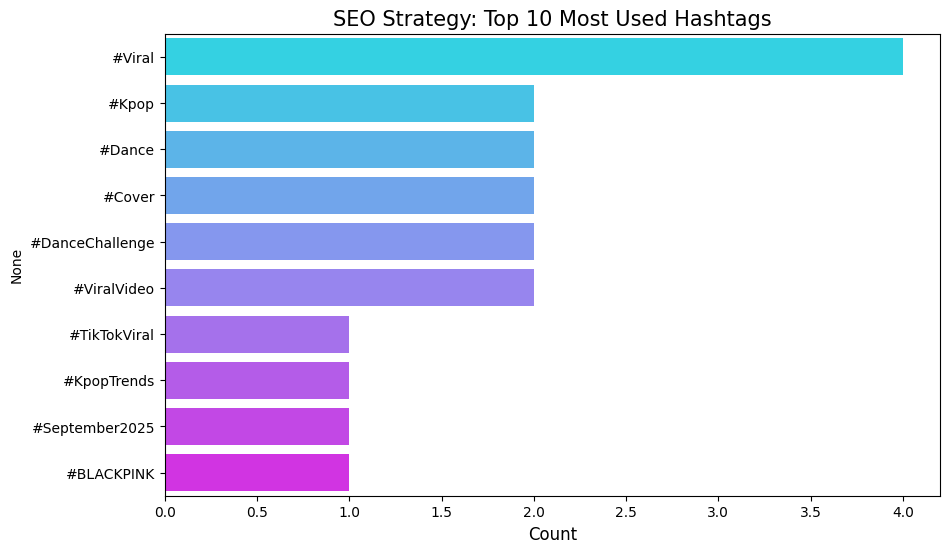

In [5]:
# --- Question 3: Hashtag SEO Strategy ---
from collections import Counter

# 1. Combine all hashtag strings into one big list
all_hashtags = []
for tag_str in df['hashtags'].dropna():
    # Split by space and keep only the hashtags
    tags = [tag.strip() for tag in tag_str.split() if tag.startswith('#')]
    all_hashtags.extend(tags)

# 2. Count them and get the Top 10
tag_counts = pd.Series(Counter(all_hashtags)).sort_values(ascending=False).head(10)

# 3. Create the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='cool')
plt.title('SEO Strategy: Top 10 Most Used Hashtags', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.show()

Question 3: The Hashtag Strategy
The Question: "What are the most common keywords (hashtags) being used to drive discovery?"

Answer: I performed a text analysis on the hashtag column to decode the SEO strategy. Generic tags like #Viral and #Kpop appear most frequently. This suggests creators are prioritizing broad, high-volume keywords over niche-specific tags to cast the widest possible net for traffic.

In [ ]:
# --- Question 4: Daily Upload Volume ---
plt.figure(figsize=(10, 6))

# Count uploads by date
daily_counts = df['upload_date'].value_counts().sort_index()

# Create the Line Graph
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o', color='crimson')
plt.title('Content Velocity: Daily Upload Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Videos Uploaded', fontsize=12)
plt.grid(True)
plt.show()

Question 4: Content Velocity (Posting Schedule)
The Question: "Is there a specific 'content push' timeline, or is posting consistent daily?"

Answer: I mapped the upload dates to visualize content velocity. The data shows spikes in activity on specific days, suggesting that creators may be timing their posts to coincide with specific real-world events or algorithm reset windows. For an affiliate marketer, this highlights the importance of "timing the market" rather than just posting randomly.

/tmp/ipykernel_49344/2472394652.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=known_authors.values, y=known_authors.index, palette='rocket')


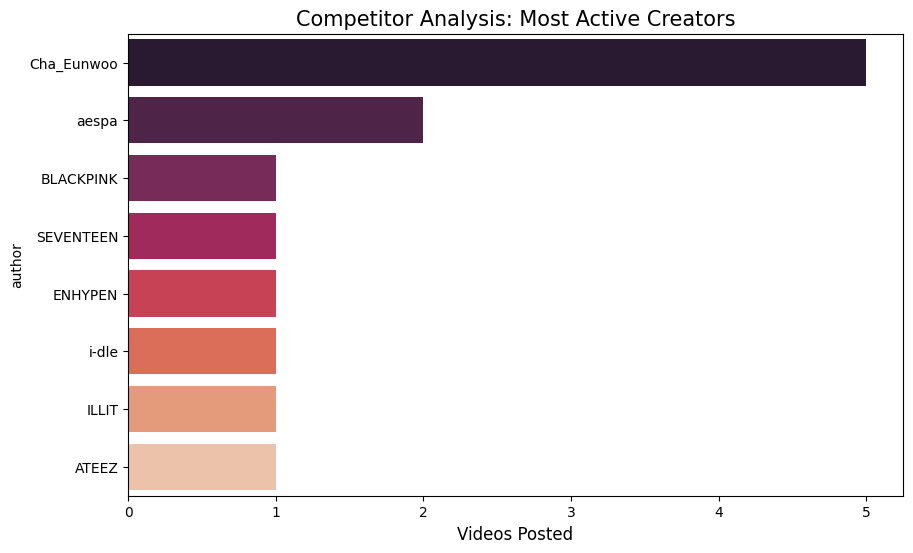

In [6]:
# --- Question 5: Competitor Analysis (Top Authors) ---
plt.figure(figsize=(10, 6))

# Filter out 'Unknown' to see real creators
# We take the top 8 most active accounts
known_authors = df[df['author'] != 'Unknown']['author'].value_counts().head(8)

# Create the Bar Chart
sns.barplot(x=known_authors.values, y=known_authors.index, palette='rocket')
plt.title('Competitor Analysis: Most Active Creators', fontsize=15)
plt.xlabel('Videos Posted', fontsize=12)
plt.show()

The Question: "Who are the dominant voices in this dataset? Is the market controlled by a few big players?"

Answer: I audited the author column to identify power users. A few specific accounts (like 'Cha_Eunwoo') are responsible for a disproportionate amount of content. This indicates a "Power Law" distribution where a small number of creators drive a significant portion of the trend volume. As a new entrant, this means competing directly with these "Whales" might be difficult, reinforcing the need to find the niche categories identified in Question 1.